In [65]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
plt.style.use('ggplot')
import scipy

<h1> Reading in Data </h1>

In [66]:
players = pd.read_csv('../csv/players.csv')
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC


In [67]:
players.tail()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,...,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,...,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,...,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,...,NaN,NaN,75000.0,75000.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio
30301,925584,Axel,Guessand,Axel Guessand,2023,410,axel-guessand,France,Schiltigheim,France,...,left,184.0,250000.0,300000.0,2027-06-30 00:00:00,CAA Stellar,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/axel-guessand/...,IT1,Udinese Calcio


In [68]:
players.dtypes

player_id                                 int64
first_name                               object
last_name                                object
name                                     object
last_season                               int64
current_club_id                           int64
player_code                              object
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object
sub_position                             object
position                                 object
foot                                     object
height_in_cm                            float64
market_value_in_eur                     float64
highest_market_value_in_eur             float64
contract_expiration_date                 object
agent_name                               object
image_url                                object
url                                     

In [69]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

<h3>Let's check how many null values appear and in which columns</h3>

In [70]:
null_counts = players.isnull().sum()
null_counts

player_id                                   0
first_name                               1965
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2689
city_of_birth                            2203
country_of_citizenship                    543
date_of_birth                              47
sub_position                              172
position                                    0
foot                                     2389
height_in_cm                             2098
market_value_in_eur                     10919
highest_market_value_in_eur              1321
contract_expiration_date                11467
agent_name                              15361
image_url                                   0
url                                         0
current_club_domestic_competition_

In [71]:
players['market_value_in_eur'].fillna(0, inplace=True)
players['highest_market_value_in_eur'].fillna(0, inplace=True)

<h1>Column descriptions</h1>

In [72]:
players.shape

(30302, 23)


<font color='yellow'>player_id:</font> A unique identifier for each player.



<font color='yellow'>first_name:</font> The player's first name. <font color="red">1965 null values.</font> <font color="green">These missing values may be due to lack of information, but we can still rely on the player_id to uniquely identify a player.</font>



<font color='yellow'>last_name:</font> The player's last name.



<font color='yellow'>name:</font> The player's full name.



<font color='yellow'>last_season:</font> The last season in which the player played.



<font color='yellow'>current_club_id:</font> A unique identifier for the player's current club.



<font color='yellow'>player_code:</font> A unique code associated with each player.



<font color='yellow'>country_of_birth:</font> The player's country of birth. <font color="red">2689 null values.</font> <font color="green">These missing values do not represent a problem.</font>



<font color='yellow'>city_of_birth:</font> The player's city of birth. <font color="red">2203 null values.</font> <font color="green">These missing values do not represent a problem.</font>



<font color='yellow'>country_of_citizenship:</font> The player's country of citizenship. <font color="red">543 null values.</font> <font color="green">These missing values do not represent a problem.</font>



<font color='yellow'>date_of_birth:</font> The player's date of birth. <font color="red">47 null values.</font> <font color="green">These missing values do not represent a problem.</font>



<font color='yellow'>position:</font> The player's primary playing position. <font color="red">172 null values.</font> 



<font color='yellow'>sub_position:</font> A secondary position in which the player can play. <font color="green">It should not be a problem. In case of missing values, position can be used.</font>



<font color='yellow'>foot:</font> The player's preferred foot (right, left, etc.). <font color="red">2389 null values.</font> <font color="green">These missing values do not represent a problem.</font>


<font color='yellow'>height_in_cm:</font> The player's height in centimeters. <font color="red">2098 null values.</font> <font color="green">These missing values do not represent a problem.</font>



<font color='yellow'>market_value_in_eur:</font> The player's current market value in euros. <font color="red">10919 null values</font> <font color="green">New or young players often do not have an established market value. Additionally, inactive or retired players may not have a current market value. </font>



<font color='yellow'>highest_market_value_in_eur:</font> The player's highest market value ever reached in euros. <font color="red">1321 null values.</font> <font color="green">This metric, being the historical maximum, is more frequent than the current market value. Even inactive players can have a historical value recorded. </font>



<font color='yellow'>contract_expiration_date:</font> The player's contract expiration date. <font color="red">11437 null values.</font><font color="green">Lack of contract information can be due to players without a contract (free agents), contracts currently being negotiated, or simply outdated data.</font>



<font color='yellow'>agent_name:</font> The player's agent's name. <font color="red">15361 null values</font>  <font color="green">These missing values do not represent a problem.</font>


<font color='yellow'>image_url:</font> An URL to the player's image.



<font color='yellow'>url:</font> An URL to the player's profile on a specific website.



<font color='yellow'>current_club_domestic_competition_id:</font> A unique identifier for the player's current club's domestic competition.



<font color='yellow'>current_club_name:</font> The player's current club's name.



In [73]:
players['height_in_cm'].describe()


count    28204.000000
mean       182.234577
std          6.833916
min         18.000000
25%        178.000000
50%        182.000000
75%        187.000000
max        207.000000
Name: height_in_cm, dtype: float64

<h1> Subsetting Data </h1>

In [74]:
# The columns 'first_name' and 'last_name' were removed, as the player's full name is already available in the column 'name'. The column 'player_code' was removed because 'player_id' provides an equivalent unique identifier. 'current_club_name' was discarded because club information, including the name, can be obtained through 'current_club_id'. Finally, the column 'url' was excluded because it contains only external links, which are not relevant to our analysis.
columns_to_drop = ['first_name', 'last_name', 'player_code', 'current_club_name', 'url']
players_sub = players.drop(columns = columns_to_drop)


<h1> Casting dtypes </h3>

In [75]:
players_sub.dtypes

player_id                                 int64
name                                     object
last_season                               int64
current_club_id                           int64
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object
sub_position                             object
position                                 object
foot                                     object
height_in_cm                            float64
market_value_in_eur                     float64
highest_market_value_in_eur             float64
contract_expiration_date                 object
agent_name                               object
image_url                                object
current_club_domestic_competition_id     object
dtype: object

In [76]:
# The columns 'date_of_birth' and 'contract_expiration_date' were converted to the 'datetime' type.

players_sub['date_of_birth'] = pd.to_datetime(players_sub['date_of_birth'], errors='coerce')

players_sub['contract_expiration_date'] = pd.to_datetime(players_sub['contract_expiration_date'], errors='coerce')

players_sub.dtypes

player_id                                        int64
name                                            object
last_season                                      int64
current_club_id                                  int64
country_of_birth                                object
city_of_birth                                   object
country_of_citizenship                          object
date_of_birth                           datetime64[ns]
sub_position                                    object
position                                        object
foot                                            object
height_in_cm                                   float64
market_value_in_eur                            float64
highest_market_value_in_eur                    float64
contract_expiration_date                datetime64[ns]
agent_name                                      object
image_url                                       object
current_club_domestic_competition_id            object
dtype: obj

<h1> Inspect data </h1>

In [77]:
# checking if player_id column is unique
player_id_unique = players_sub['player_id'].is_unique
player_id_unique

True

In [78]:
# checking if different values for column last_season are correct
players_sub['last_season'].unique()

array([2014, 2012, 2013, 2015, 2017, 2020, 2018, 2019, 2016, 2021, 2022,
       2023], dtype=int64)

In [79]:
players_sub['foot'].unique()

array([nan, 'right', 'left', 'both'], dtype=object)

In [80]:
players_sub['foot'].fillna("none", inplace=True)

<h1> Adding new columns </h1>

In [81]:
# Added an 'is_active' column that indicates whether players are still active, using a criterion where a player is considered active if they have played in at least the last three seasons. The 'market_value_fluctuation' represents the market value change between the highest value reached and the current value. If the current value is zero because the player is no longer active, then the fluctuation will correspond to the highest market value achieved.
current_year = datetime.now().year
years_considered_active = 3
players_sub['is_active'] = (current_year - players_sub['last_season']) <= years_considered_active

players_sub['market_value_fluctuation'] = players_sub['highest_market_value_in_eur'] - players_sub['market_value_in_eur']


players_sub

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,current_club_domestic_competition_id,is_active,market_value_fluctuation
0,598,Timo Hildebrand,2014,24,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,none,NaN,0.0,10000000.0,NaT,NaN,https://img.a.transfermarkt.technology/portrai...,L1,False,10000000.0
1,670,Martin Petrov,2012,714,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,none,NaN,0.0,12000000.0,NaT,IFM,https://img.a.transfermarkt.technology/portrai...,ES1,False,12000000.0
2,1323,Martin Amedick,2012,24,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,none,NaN,0.0,2750000.0,NaT,NaN,https://img.a.transfermarkt.technology/portrai...,L1,False,2750000.0
3,3195,Jermaine Pennant,2013,512,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173.0,0.0,10500000.0,NaT,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,GB1,False,10500000.0
4,3259,Damien Duff,2013,931,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177.0,0.0,17000000.0,NaT,NaN,https://img.a.transfermarkt.technology/portrai...,GB1,False,17000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka Bijol,2023,410,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,2027-06-30,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,IT1,True,0.0
30298,537171,Semuel Pizzignacco,2018,410,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,2025-06-30,NaN,https://img.a.transfermarkt.technology/portrai...,IT1,False,25000.0
30299,586756,Festy Ebosele,2023,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,2027-06-30,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,IT1,True,0.0
30300,704692,Nicolò Cocetta,2022,410,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,none,NaN,75000.0,75000.0,2023-06-30,NaN,https://img.a.transfermarkt.technology/portrai...,IT1,True,0.0


<h1> Visual analysis of data </h1>

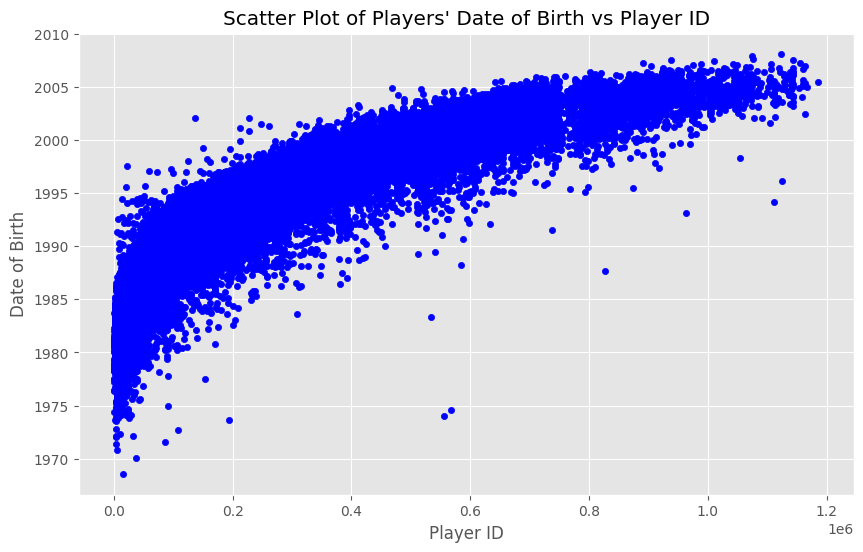

In [82]:
#layers_sub.plot(kind='scatter', x='', y='')
players_sub.plot(kind='scatter', x='player_id', y='date_of_birth', figsize=(10, 6), color='blue')

plt.title('Scatter Plot of Players\' Date of Birth vs Player ID')
plt.xlabel('Player ID')
plt.ylabel('Date of Birth')
plt.show()

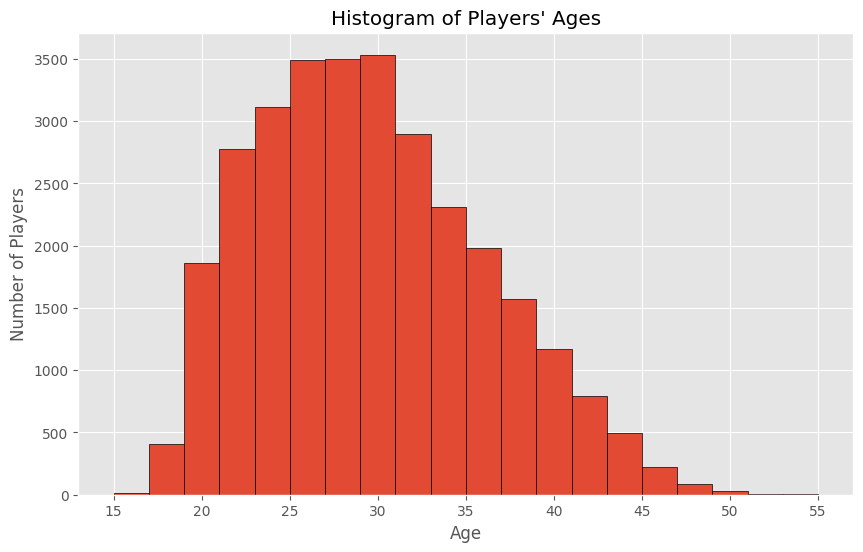

In [83]:
current_date = datetime.now()
players_sub['age'] = players_sub['date_of_birth'].apply(lambda dob: (current_date - dob).days // 365 if pd.notnull(dob) else None)

plt.figure(figsize=(10, 6))
players_sub['age'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Players\' Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

In [84]:
players_sub['foot'].unique()

array(['none', 'right', 'left', 'both'], dtype=object)

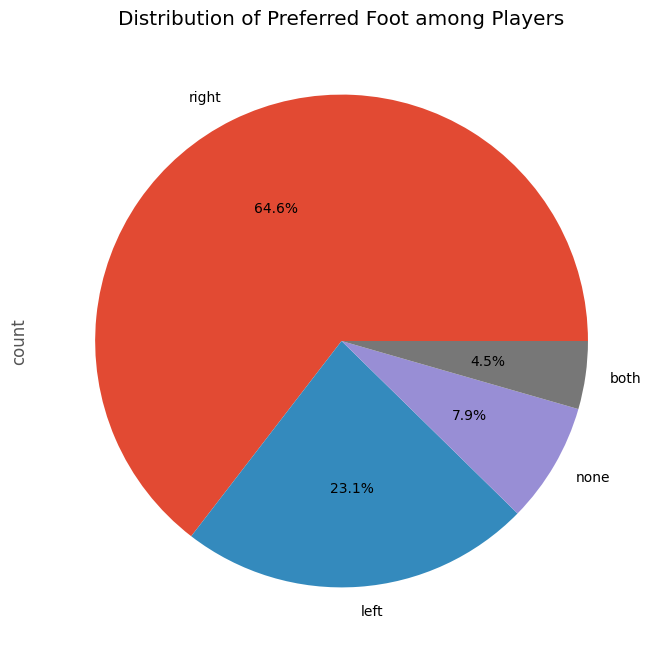

In [85]:
foot_counts = players_sub['foot'].value_counts()

plt.figure(figsize=(8, 8))
foot_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Preferred Foot among Players')
plt.show()

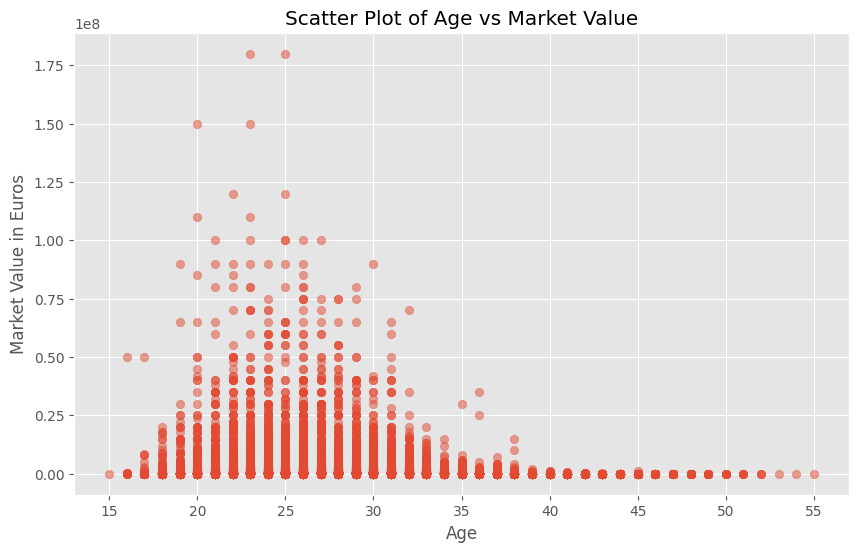

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(players_sub['age'], players_sub['market_value_in_eur'], alpha=0.5)
plt.title('Scatter Plot of Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value in Euros')
plt.grid(True)
plt.show()

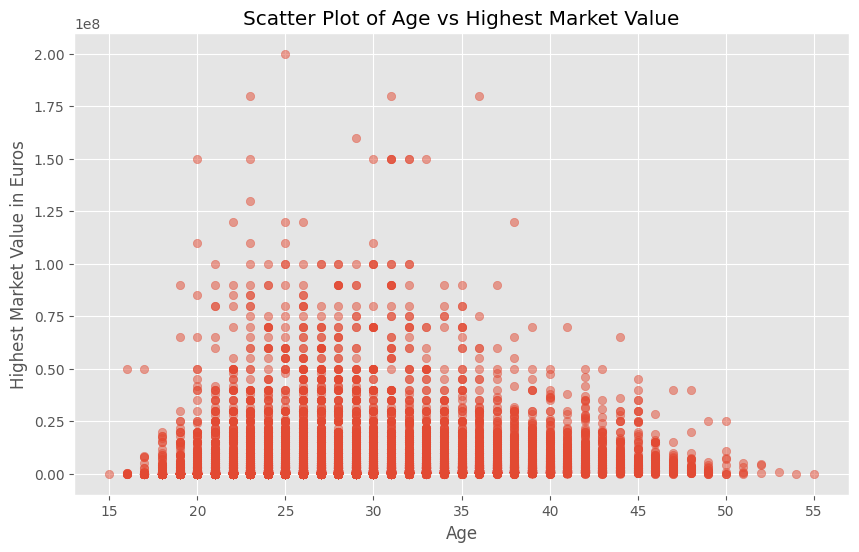

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(players_sub['age'], players_sub['highest_market_value_in_eur'], alpha=0.5)
plt.title('Scatter Plot of Age vs Highest Market Value')
plt.xlabel('Age')
plt.ylabel('Highest Market Value in Euros')
plt.grid(True)
plt.show()

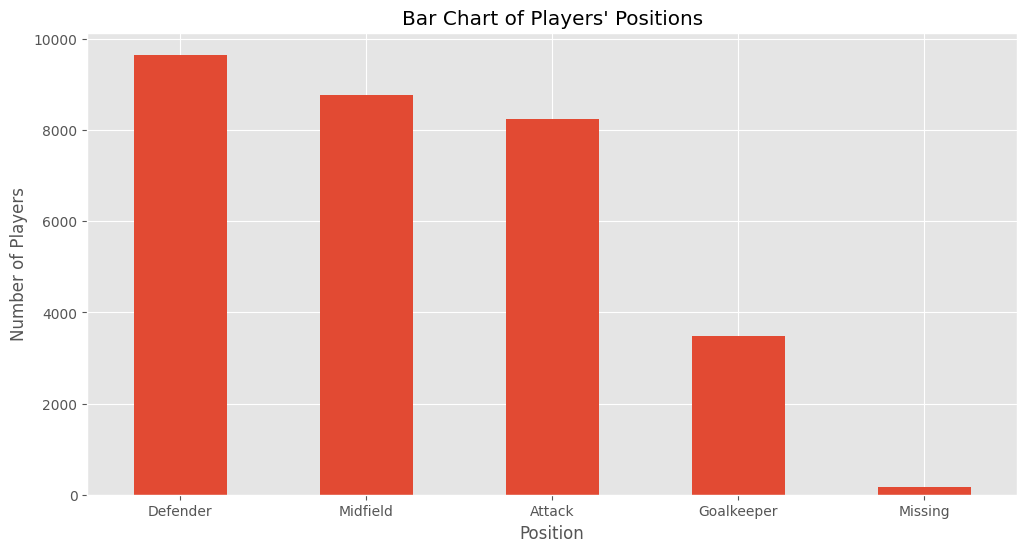

In [88]:
position_counts = players_sub['position'].value_counts()

plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar')
plt.title('Bar Chart of Players\' Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.grid(True)
plt.xticks(rotation=360)
plt.show()

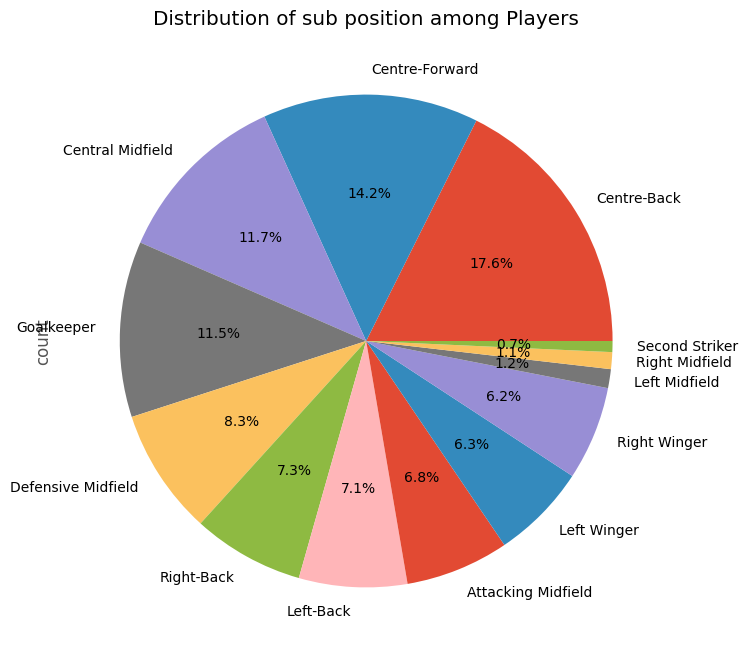

In [89]:
sub_position_counts = players_sub['sub_position'].value_counts()

plt.figure(figsize=(8, 8))
sub_position_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of sub position among Players')
plt.show()

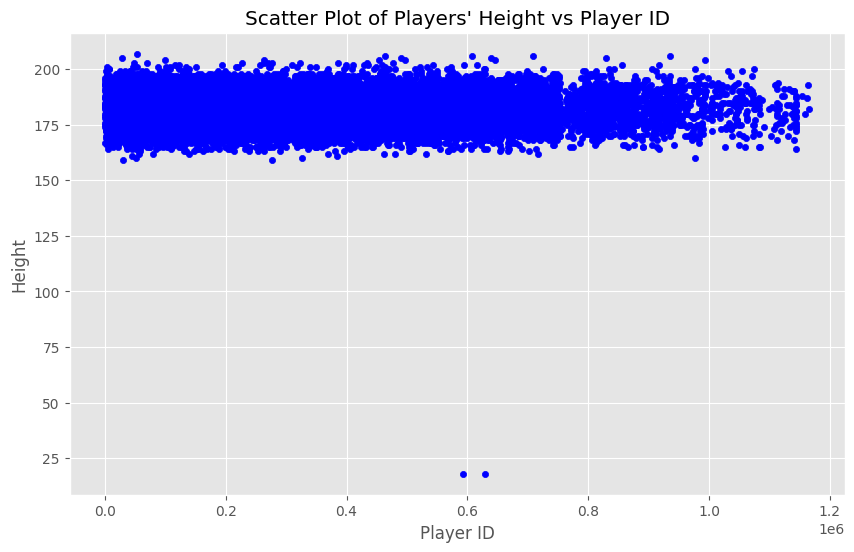

In [90]:
players_sub.plot(kind='scatter', x='player_id', y='height_in_cm', figsize=(10, 6), color='blue')

plt.title('Scatter Plot of Players\' Height vs Player ID')
plt.xlabel('Player ID')
plt.ylabel('Height')
plt.show()

In [91]:
height_outliers = players_sub[players_sub['height_in_cm'] < 25]
# Displaying the outliers
height_outliers

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,current_club_domestic_competition_id,is_active,market_value_fluctuation,age
6846,592398,Aïssa Boudechicha,2021,40,NaN,Medjana,Algeria,2000-04-13,Left-Back,Defender,...,18.0,150000.0,150000.0,2023-06-30,NaN,https://img.a.transfermarkt.technology/portrai...,FR1,True,0.0,23.0
8716,628490,Genar Fornés,2021,2687,Spain,Barcelona,Spain,2000-01-17,Left-Back,Defender,...,18.0,150000.0,150000.0,2023-06-30,Proneo Sports S.L.,https://img.a.transfermarkt.technology/portrai...,ES1,True,0.0,24.0


In [92]:
# Correcting the height values for the specified player_ids by setting them to NaN
outlier_player_ids = [592398, 628490]

# Using a query to select and update the heights to NaN for the specified player_ids
players_sub.loc[players_sub['player_id'].isin(outlier_player_ids), 'height_in_cm'] = None

# Verifying the correction
corrected_rows = players_sub[players_sub['player_id'].isin(outlier_player_ids)]
corrected_rows

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,current_club_domestic_competition_id,is_active,market_value_fluctuation,age
6846,592398,Aïssa Boudechicha,2021,40,NaN,Medjana,Algeria,2000-04-13,Left-Back,Defender,...,NaN,150000.0,150000.0,2023-06-30,NaN,https://img.a.transfermarkt.technology/portrai...,FR1,True,0.0,23.0
8716,628490,Genar Fornés,2021,2687,Spain,Barcelona,Spain,2000-01-17,Left-Back,Defender,...,NaN,150000.0,150000.0,2023-06-30,Proneo Sports S.L.,https://img.a.transfermarkt.technology/portrai...,ES1,True,0.0,24.0


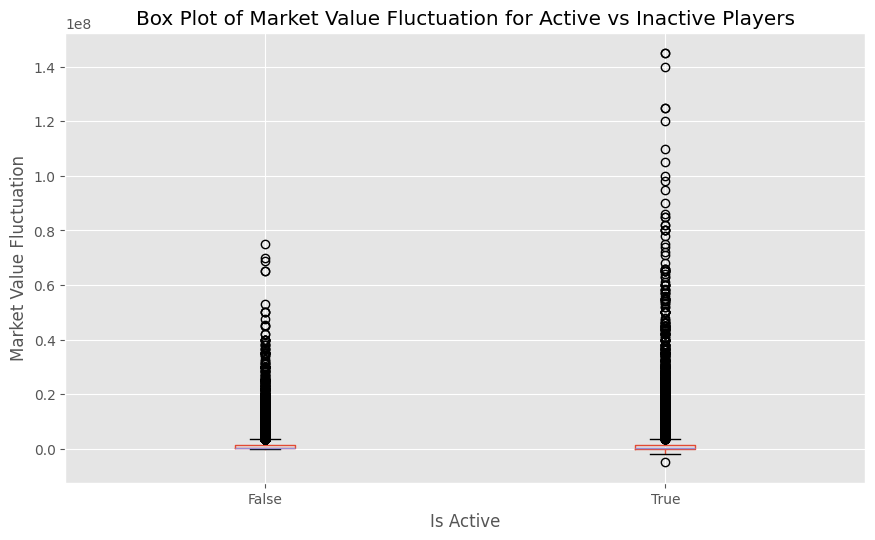

In [93]:
players_sub.boxplot(by='is_active', column='market_value_fluctuation', figsize=(10, 6))
plt.title('Box Plot of Market Value Fluctuation for Active vs Inactive Players')
plt.suptitle('') 
plt.xlabel('Is Active')
plt.ylabel('Market Value Fluctuation')
plt.show()

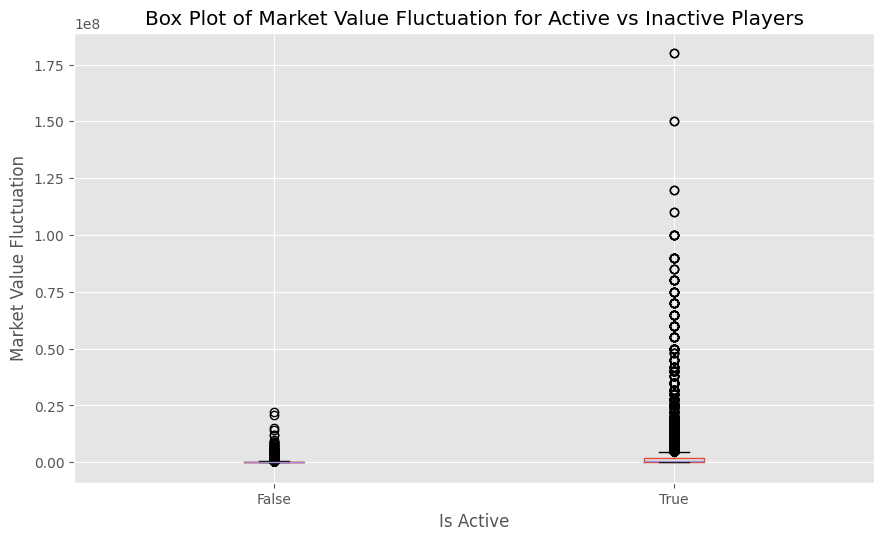

In [94]:
players_sub.boxplot(by='is_active', column='market_value_in_eur', figsize=(10, 6))
plt.title('Box Plot of Market Value Fluctuation for Active vs Inactive Players')
plt.suptitle('')  
plt.xlabel('Is Active')
plt.ylabel('Market Value Fluctuation')
plt.show()